<a href="https://colab.research.google.com/github/SurajKariyavar/Old_Car_PricePrediction/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requered Libraries for Natural Language Processing

In [22]:
import pandas as pd
import numpy as np
import spacy
import itertools
from spacy.lang.en.stop_words import STOP_WORDS
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Importing Data From local Machine (Coumputer)

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Airline_Tweets.csv to Airline_Tweets.csv


Contraction Dictionery

In [23]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


Reading CSV file and Removing Not requered Columns from CSV file

In [25]:
df=pd.read_csv('Airline_Tweets.csv')
df=df.drop(labels=['tweet_id','airline_sentiment_confidence' ,'negativereason_confidence', 'airline_sentiment_gold','name', 'negativereason_gold','tweet_coord', 'tweet_created','tweet_location', 'user_timezone'],axis=1)
df=df.drop(labels=['negativereason','airline','retweet_count'],axis=1)
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Taking some sample data from dataset particularly Negative,Neutral,Positive and appending in One Variable

In [42]:
df1=df[df['airline_sentiment']=='negative'].sample(2500)
df2=df[df['airline_sentiment']=='neutral'].sample(2500)
df3=df[df['airline_sentiment']=='positive'].sample(2300)
df4=df1.append(df2)
df=df4.append(df3)
df.head()

ValueError: ignored

**DATA PREPROCESSING**

Contraction to Expansion Text from Dataset (ex : arn't == are not)

In [27]:
def cont_to_ex(x):
  if type(x) is str:
    for i in contractions:
      value=contractions[i]
      x=x.replace(i,value)
    return x
  else:
    return x


df['text']=df['text'].apply(lambda x: cont_to_ex(x))
df.head()

,airline_sentiment,text
14139,negative,@AmericanAir now I have to pay for a hotel a c...
11792,negative,@USAirways @AmericanAir best u could do-I mig...
10572,negative,@USAirways Sadly your words do not represent y...
7798,negative,@JetBlue I have been in pricing for 8 years to...
9051,negative,@USAirways but I have been trying to call them...


Removing Emojis from Dataset

In [28]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


df['text']=df['text'].apply(lambda x: remove_emoji(x))
df.head()

,airline_sentiment,text
14139,negative,@AmericanAir now I have to pay for a hotel a c...
11792,negative,@USAirways @AmericanAir best u could do-I mig...
10572,negative,@USAirways Sadly your words do not represent y...
7798,negative,@JetBlue I have been in pricing for 8 years to...
9051,negative,@USAirways but I have been trying to call them...


removing Panctuation from data set and Digits

> Indented block



In [29]:
df['text']=df['text'].apply(lambda x:re.sub("([a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+)",'' , x) )
df['text']=df['text'].apply(lambda x: re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]','',x))
df['text']=df['text'].apply(lambda x: re.sub("\d+", "", x))
df['text']=df['text'].apply(lambda x: re.sub('@','',x))
df['text']=df['text'].apply(lambda x:re.sub('#','',x))
df.head()

,airline_sentiment,text
14139,negative,AmericanAir now I have to pay for a hotel a ca...
11792,negative,USAirways AmericanAir best u could doI might ...
10572,negative,USAirways Sadly your words do not represent yo...
7798,negative,JetBlue I have been in pricing for years to k...
9051,negative,USAirways but I have been trying to call them ...


All letters making small charecters  

In [30]:
df['text']=df['text'].apply(lambda x: x.lower())
df.head()

,airline_sentiment,text
14139,negative,americanair now i have to pay for a hotel a ca...
11792,negative,usairways americanair best u could doi might ...
10572,negative,usairways sadly your words do not represent yo...
7798,negative,jetblue i have been in pricing for years to k...
9051,negative,usairways but i have been trying to call them ...


Removing STOP_WORDS like (ex : is,are,these)

In [31]:
df['text']=df['text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS])) 
df.head()

,airline_sentiment,text
14139,negative,americanair pay hotel car ride miss classes pa...
11792,negative,usairways americanair best u doi refund billin...
10572,negative,usairways sadly words represent company's acti...
7798,negative,jetblue pricing years know bucks seat criminal...
9051,negative,usairways trying yesterday getting hung on? th...


Removing HYPER_LINKS like ( http:// )

In [32]:
df['text']=df['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',' ', x))
df.head()

,airline_sentiment,text
14139,negative,americanair pay hotel car ride miss classes pa...
11792,negative,usairways americanair best u doi refund billin...
10572,negative,usairways sadly words represent company's acti...
7798,negative,jetblue pricing years know bucks seat criminal...
9051,negative,usairways trying yesterday getting hung on? th...


Label Encoding (Negative : 0 ,Neutral:1 , Positive:2)

In [33]:
label_encoder = preprocessing.LabelEncoder()
df['airline_sentiment']=label_encoder.fit_transform(df['airline_sentiment'])
df.head()

,airline_sentiment,text
14139,0,americanair pay hotel car ride miss classes pa...
11792,0,usairways americanair best u doi refund billin...
10572,0,usairways sadly words represent company's acti...
7798,0,jetblue pricing years know bucks seat criminal...
9051,0,usairways trying yesterday getting hung on? th...


Seperating Target and Independent data (Target=airline sentiment, Independent= text )  

In [34]:
y=df['airline_sentiment']
x=df['text']

Spliting data for train and test

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0,)

Intializing RnadomForest object

In [36]:
rf=RandomForestClassifier(random_state=43,n_jobs=-1,n_estimators=200)

Term Frequency and Invers Document Frequency

In [37]:
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
counts = vectorizer.fit_transform(x_train)
vocab = vectorizer.vocabulary_

Fitting The Model

In [38]:
model = rf.fit(counts, y_train)

Making Prediction

In [40]:
example_counts = vectorizer.transform(x_test)
predictions = model.predict(example_counts)
print(predictions)

[1 1 0 ... 0 1 2]


Finding Accuracy Score,How Best our works or predicts the given data 

In [13]:
score=accuracy_score(y_test,predictions)
print(score)

0.6883561643835616


In [ ]:
Recall and Precision of Confusion metrics

In [15]:
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None)
capture = recall_score(y_test, predictions, average=None)

print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.69
              precision    recall  f1-score   support

           0       0.79      0.58      0.67       489
           1       0.60      0.77      0.67       519
           2       0.74      0.71      0.73       452

    accuracy                           0.69      1460
   macro avg       0.71      0.69      0.69      1460
weighted avg       0.71      0.69      0.69      1460



Plotting the Confusion Metrix 

In [17]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(150,100))

,Category,Index
0,bad cmt,1
1,better cmt,2
2,best cmt,3


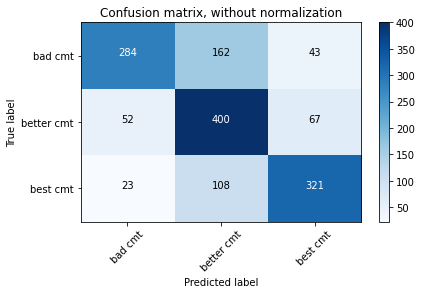

<Figure size 10800x7200 with 0 Axes>

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

class_names =['bad cmt','better cmt','best cmt']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

classInfo = pd.DataFrame(data=[])
for i in range(0,len(class_names)):
    classInfo = classInfo.append([[class_names[i],i+1]],ignore_index=True)

classInfo.columns=['Category','Index']
classInfo